# The Simple Regression Model

### Intro and objectives
#### review continuous distributions
### review methods to explore the distribution of continuous data

### In this lab you will learn:
1. examples of simple regression models.
2. how to fit simple regression models in Python.


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit a simple regression model.
* Examples of simple regression models
* How to interpret the results obtained

In [26]:
!pip install wooldridge
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Example 1. CEO Salary and Return on Equity



### For the population of chief executive officers, let y be annual salary (salary) in thousands of dollars.
### Thus, y=856.3 indicates an annual salary of 856,300 dollars, and y=1,452.6 indicates a salary of 1,452,600 dollars.


### Let x be the average return on equity (roe) for the CEO’s firm for the previous three years. (Return on equity is defined in terms of net income as a percentage of common equity.) For example, if roe=10, then average return on equity is 10%.

### To study the relationship between this measure of firm performance and CEO compensation, we postulate the simple model:

$ salary=\beta_0+\beta_1*roe+u $


### The slope parameter $ \beta_1 $ measures the change in annual salary, in thousands of dollars, when return on equity increases by one percentage point.

### The data set CEOSAL1 contains information on 209 CEOs for the year 1990; these data were obtained from Business Week (5/6/91). In this sample, the average annual salary is 1,281,120 dollars with the smallest and largest being 223,000 dollars and 14,822,000 dollars respectively. 
### The average return on equity for the years 1988, 1989, and 1990 is 17.18%, with the smallest and largest values being 0.5% and 56.3%, respectively.

### Using the data in CEOSAL1, the OLS regression line relating salary to roe is:

In [27]:
CeoSalaries = woo.dataWoo('ceosal1')

In [28]:
CeoSalaries.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [29]:
CeoSalaries.describe()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,13.282297,6923.793282,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,1372.345308,32.633921,10633.271088,8.518509,97.219399,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013161
min,223.000000,-61.000000,175.199997,0.500000,-98.900002,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,736.000000,-1.000000,2210.300049,12.400000,-21.200001,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,1039.000000,9.000000,3705.199951,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,14822.000000,212.000000,97649.898438,56.299999,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489144


In [30]:
type(CeoSalaries)

pandas.core.frame.DataFrame

In [31]:
# We impose a simple, linear, model: 
# We specify CeoSalaries as the empirical dataset

reg = smf.ols(formula='salary ~ roe', data=CeoSalaries)


In [32]:
# We fit the model
results = reg.fit()


In [33]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept    963.191336
roe           18.501186
dtype: float64



## Based on the previous we have fitted the following model:

$ salary=963.19+18.50*roe+u $


## How do we interpret the equation?

#### First, if the return on equity is zero, roe=0, then the predicted salary is the intercept, 963.191, which equals 963,191 dollars because salary is measured in thousands.

#### We can write the predicted change in salary as a function of the change in roe: $\Delta$salary=18.50$\Delta$roe

#### This means that if the return on equity increasesby one percentage point, $\Delta$roe=1, then salary is predicted to change by about 18.5, or 18500 dollars.

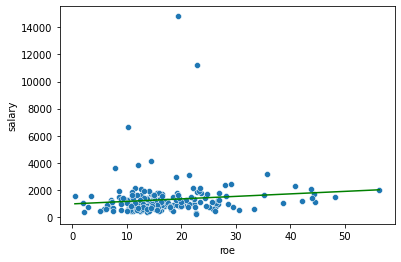

In [34]:
sns.scatterplot(data=CeoSalaries, x='roe',y='salary')

sns.lineplot(data=CeoSalaries, x=CeoSalaries['roe'], y=results.fittedvalues,color='green')
